# Breast Cancer Classification using ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df['label'] = data.target

In [5]:
# Checking Missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [6]:
x = df.drop(columns = 'label' ,axis = 1)
y = df['label']

In [7]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# BUILD ANN MODEL - Artificial Neural Network

In [10]:
import tensorflow as tf
from tensorflow import keras

2023-09-30 17:34:47.166203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [12]:
#Compiling the Neural Network

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
# Training the neural network

history = model.fit(x_train_scaled , y_train , validation_split = 0.15 , epochs = 10)

Epoch 1/10
13/13 [==============================] - 0s 15ms/step - loss: 0.1411 - accuracy: 0.9611 - val_loss: 0.1520 - val_accuracy: 0.9565
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1312 - accuracy: 0.9663 - val_loss: 0.1426 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1228 - accuracy: 0.9689 - val_loss: 0.1349 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1160 - accuracy: 0.9689 - val_loss: 0.1287 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 16ms/step - loss: 0.1099 - accuracy: 0.9715 - val_loss: 0.1223 - val_accuracy: 0.9710
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1044 - accuracy: 0.9741 - val_loss: 0.1155 - val_accuracy: 0.9710
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0991 - accuracy: 0.9793 - val_loss: 0.1103 - val_accuracy: 0.9710
Epoch 8/10
13/13 [

# VISUALIZATION

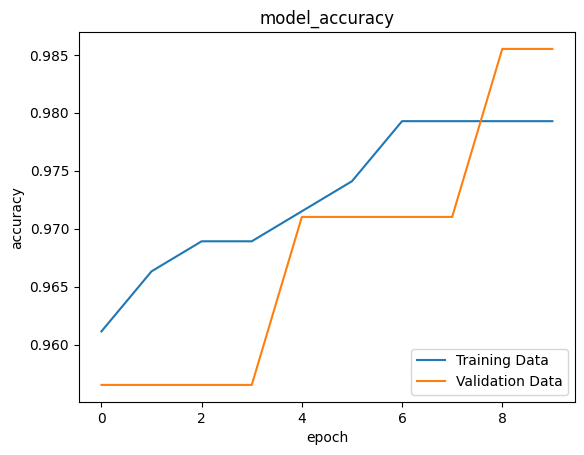

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data','Validation Data'],loc = 'lower right')

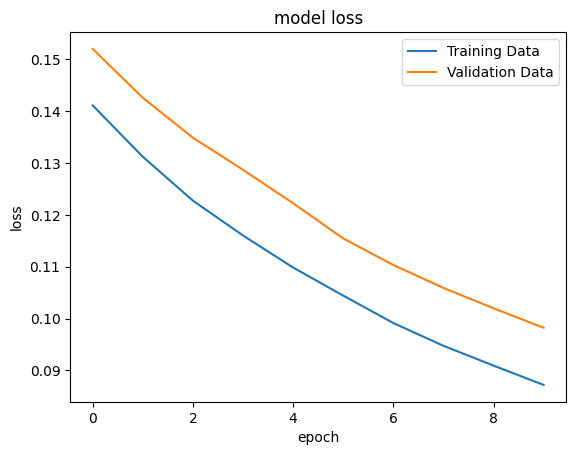

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['Training Data','Validation Data'],loc = 'upper right')

# Prediction

In [23]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9649
0.9649122953414917


In [24]:
print(loss)

0.0993746817111969


In [25]:
y_pred=model.predict(x_test_scaled)


4/4 [==============================] - 0s 3ms/step
